In [164]:
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
b32 = 2**32-1
b64 = 2**64-1

# Map of asset to maximum nonce value, used later for plotting
assets_to_range = {
    "btc": b32,
    "ltc": b32, 
    "xmr": b32, 
    "dcr": b32, 
    "grin": b64
}

In [153]:
def query_nonces(table):
    with psycopg2.connect("postgresql://postgres@localhost:7432/postgres2") as conn:
        with conn.cursor() as cursor:
            cursor.execute(f"SELECT nonce FROM {table} ORDER BY height ASC")
            return list(map(lambda x: int(x[0]), cursor.fetchall()))
        
def get_bitcoin_nonces():
    return _query_nonces("bitcoin")
        
def get_litecoin_nonces():
    return _query_nonces("litecoin")
        
def get_monero_nonces():
    return _query_nonces("monero")
        
def get_decred_nonces():
    return _query_nonces("decred")

def get_nonces(asset):
    if asset == "btc":
        return query_nonces("bitcoin")
    elif asset == "ltc":
        return query_nonces("litecoin")
    elif asset == "xmr":
        return query_nonces("monero")
    elif asset == "dcr":
        return query_nonces("decred")
    elif asset == "grin":
        return query_nonces("grin")
        
    raise NotImplementedError(asset)

In [150]:
nonces = {symbol: get_nonces(symbol) for symbol in assets_to_range.keys()}

In [165]:
sns.set(rc={'figure.figsize':(10,4), 'figure.dpi': 100})

def plot_distribution(asset, n_bins=200):
    sns.set_style("white")
    
    plt.title(f"{asset} nonce histogram")
    max_x = assets_to_range[asset]
    data = nonces[asset]
    plt.xlim(-1000, max_x)
    ax = sns.distplot(data, kde=False, bins=n_bins, hist_kws={"histtype": "bar", "color": "b"})
    # We need to compute the expected number of blocks per bin
    n_expected_blocks = len(data) / n_bins
    ax.axhline(y=n_expected_blocks, xmin=0.0, xmax=1, color='r', ls='--', lw=1)
    plt.xlabel("Nonce value")
    plt.ylabel("# of blocks")
    plt.show()
    
def plot(asset, alpha=0.1):
    max_x = assets_to_range[asset]
    data = nonces[asset]
    
    plt.figure(figsize=(10,4), dpi=100)
    plt.xlabel("Block height")
    plt.ylabel("Nonce value")
    plt.title(f"{asset} nonce distribution")
    plt.ylim(0, max_x)
    plt.xlim(0, len(data))
    plt.plot(data, ',', alpha=alpha)
    plt.show()

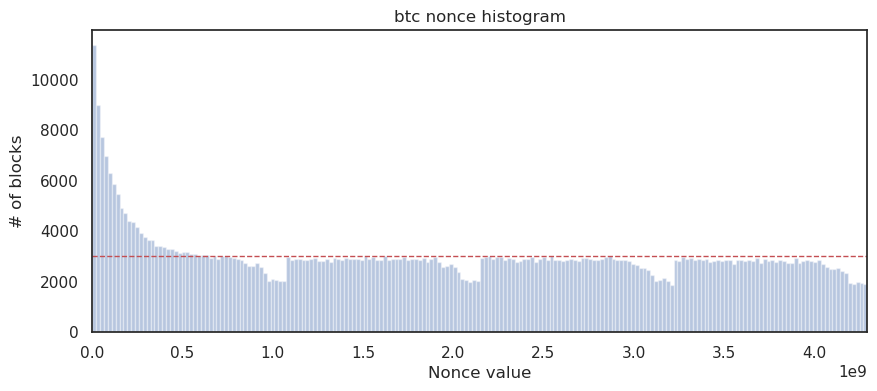

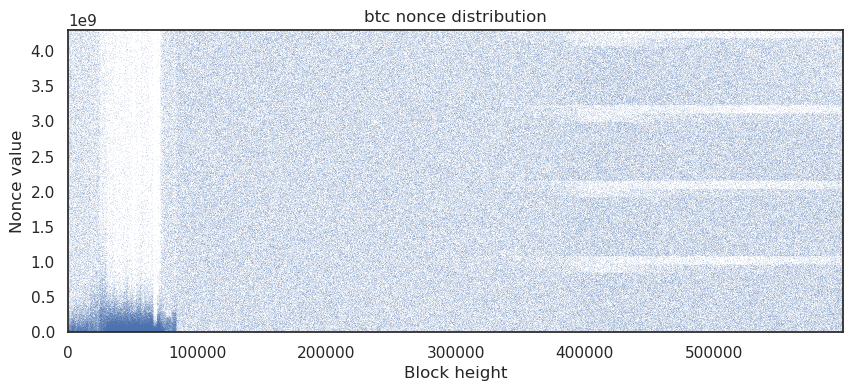

In [166]:
plot_distribution("btc")
plot("btc")

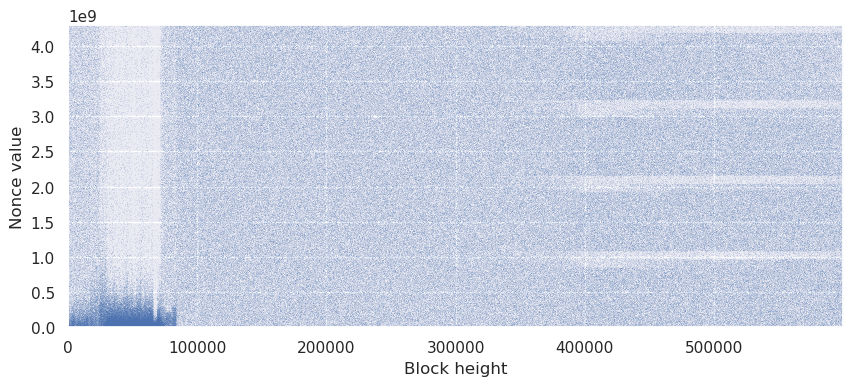

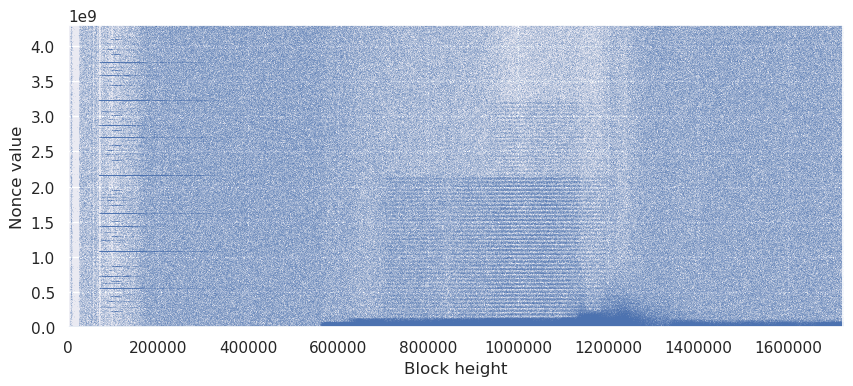

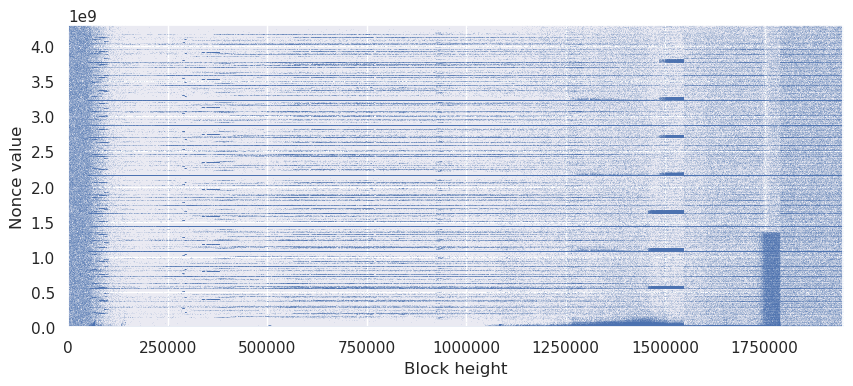

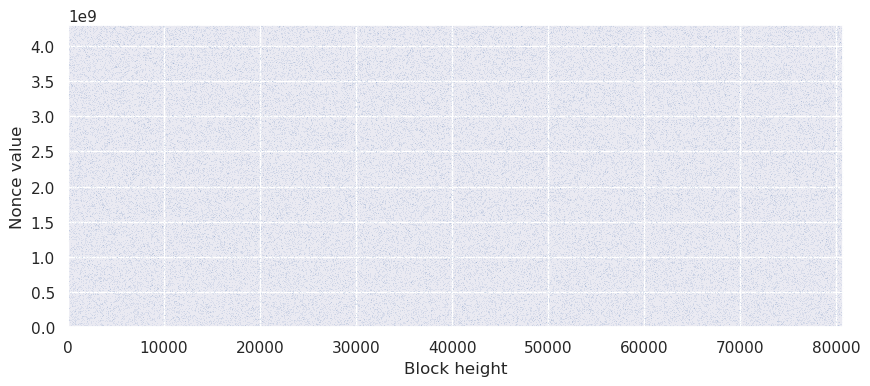

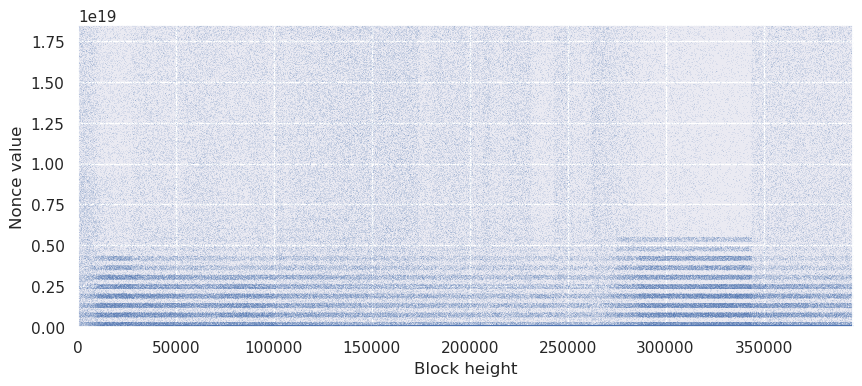

In [158]:
for asset in assets_to_range.keys():
    plot(asset)

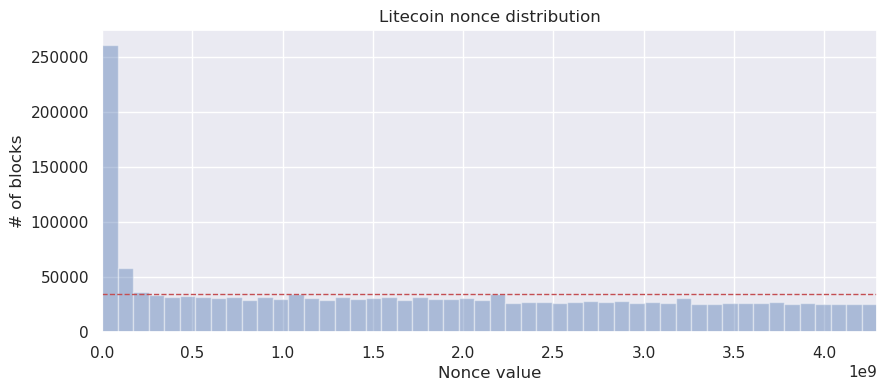

In [86]:
plot_nonces_distribution(ltc_nonces, 2**32-1, "Litecoin nonce distribution", n_bins=50)

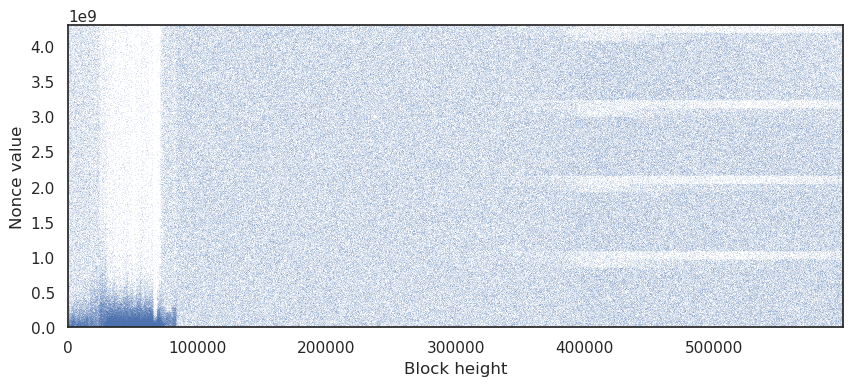

In [113]:
plot_nonces(btc_nonces, 2**32-1)

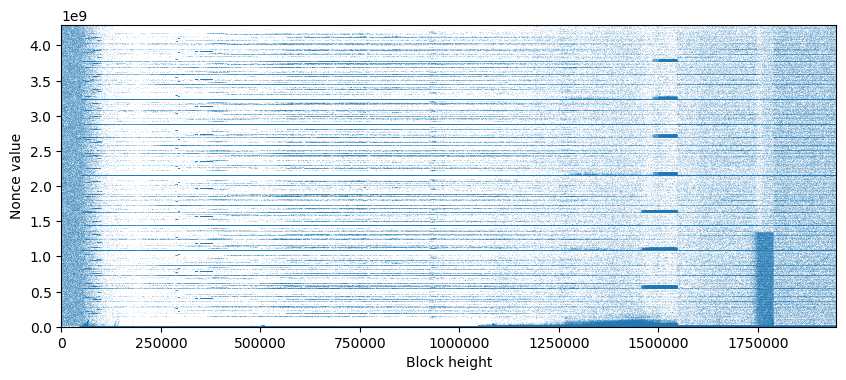

In [74]:
plot_nonces(xmr_nonces, 2**32-1)

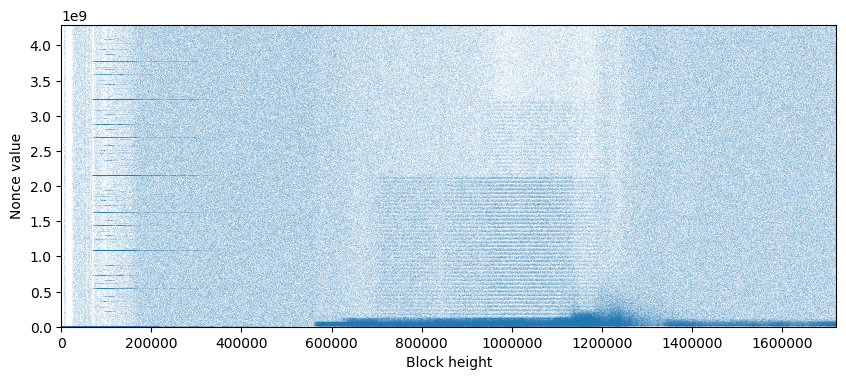

In [75]:
plot_nonces(ltc_nonces, 2**32-1, alpha=0.05)

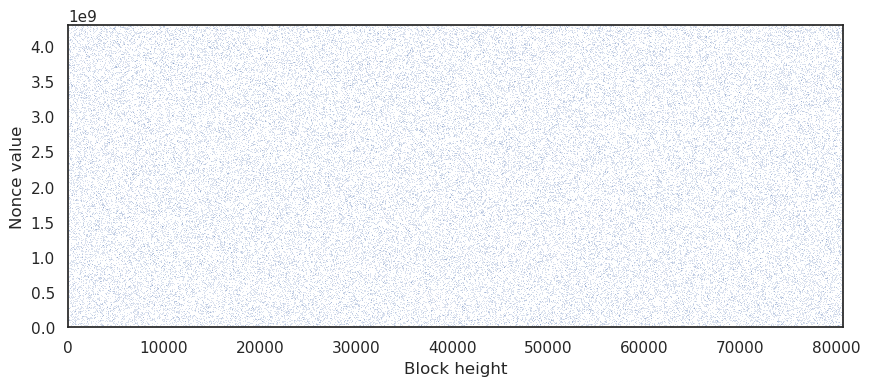

In [118]:
plot_nonces(dcr_nonces, 2**32-1, alpha=0.2)

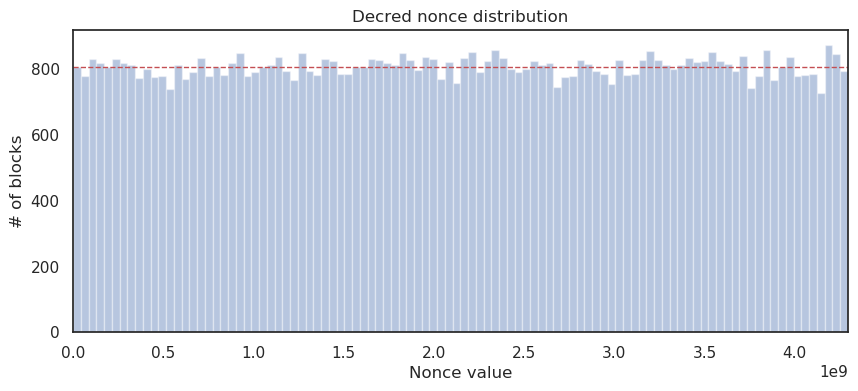

In [120]:
plot_distribution(dcr_nonces, 2**32-1, "Decred nonce distribution", n_bins=100)

In [148]:
nonces["grin"]

[Decimal('41'),
 Decimal('8433034053148818684'),
 Decimal('9127148265676732660'),
 Decimal('10857613337865312082'),
 Decimal('600709420165061644'),
 Decimal('7525574092056242316'),
 Decimal('4356525734327284447'),
 Decimal('1001916631798612910'),
 Decimal('10984426358172090870'),
 Decimal('14211724840400612257'),
 Decimal('2375089505742852120'),
 Decimal('10044520365956499659'),
 Decimal('2546692170044571987'),
 Decimal('8399237919893224603'),
 Decimal('119329100903234476'),
 Decimal('3952306216033519547'),
 Decimal('4975427942977029267'),
 Decimal('6500090725269051099'),
 Decimal('1476220536990649324'),
 Decimal('12249909196381673691'),
 Decimal('16149891569561717620'),
 Decimal('3422835082957332837'),
 Decimal('13917481804955683454'),
 Decimal('7771653858863141297'),
 Decimal('13486310560156592682'),
 Decimal('5945906467617187445'),
 Decimal('16246580376759449804'),
 Decimal('12378917067220066989'),
 Decimal('8081127173471379727'),
 Decimal('17054329935720128307'),
 Decimal('17310148